# <span style="color: gold"> Pytorch Tutorial

## <span style="color: orange">Importing Torch

In [77]:
import torch

## <span style="color: lightgreen">The Basics of Tensors

###  <span style="color:cyan">Create a tensor with specified item `torch.tensor(array/list)` 

In [78]:
tensor = torch.tensor([1, 2, 3])

### <span style="color: cyan"> Create a random tensor </span> `torch.rand(dim1, dim2, dim...)` 

In [79]:
tensor_r = torch.rand(1, 9)
tensor_r, tensor_r.shape

(tensor([[0.3595, 0.3245, 0.8871, 0.9991, 0.5664, 0.5706, 0.7217, 0.2157, 0.0415]]),
 torch.Size([1, 9]))

### <span style="color: cyan"> Remove all single dimension of a tensor  </span>`tensor.squeeze()` 

In [80]:
tensor_s = tensor_r.squeeze()
tensor_s, tensor_s.shape

(tensor([0.3595, 0.3245, 0.8871, 0.9991, 0.5664, 0.5706, 0.7217, 0.2157, 0.0415]),
 torch.Size([9]))

### <span style="color:cyan"> Add a single dimension to a target tensor at a specific dimension </span>`tensor.unsqueeze(dim)` 

In [81]:
tensor_r_un = tensor_r.unsqueeze(0)
tensor_r_un, tensor_r_un.shape

(tensor([[[0.3595, 0.3245, 0.8871, 0.9991, 0.5664, 0.5706, 0.7217, 0.2157,
           0.0415]]]),
 torch.Size([1, 1, 9]))

### <span style="color:cyan" >Rearrange dimensions of a tensor </span>`torch.permute()` -> arrange the first parameter to the first dim

In [82]:
tensor = torch.randn(3, 4)
torch.permute(tensor, (1, 0)).shape

torch.Size([4, 3])

#### <span style="color: lime"> Both tensors (before and after permuting) shares the same memory location

In [83]:
# Example
image_tensor = torch.randn(224, 244, 3)  # Height, Width, Channels
# Permute to Channels, Height, Width
permuted_tensor = torch.permute(image_tensor, (2, 0, 1))
permuted_tensor.shape 

torch.Size([3, 224, 244])

### <span style="color:lightgreen"> Indexing (selecting data from tensor)

In [84]:
import torch
x = torch.arange(1, 10)
x

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
x = x.reshape(1, 3, 3)

In [86]:
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [87]:
x[0, 0] # = x[0][0]

tensor([1, 2, 3])

In [88]:
x[0][0][0], x[0, 2, 2]

(tensor(1), tensor(9))

In [89]:
x[0, :, 1] # : -> all elements in that dimension

tensor([2, 5, 8])

In [90]:
x[0, 0, :]

tensor([1, 2, 3])

### <span style="color:lightgreen"> PyTorch tensors & NumPy 

#### Numpy to pytorch `torch.from_numpy(nd_array)`
#### Pytorch to numpy `torch.tensor.numpy()`

In [91]:
import torch
import numpy as np

array = np.arange(1.0, 8.0) # default dtype = float64
tensor = torch.from_numpy(array) # pytorch default dtype = float32 
# pytorch inherits dtype from numpy
# tensor = torch.from_numpy(array).type(torch.float32) to convert to float32
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [92]:
tensor = torch.ones(7)
numpy_tensor = tensor.numpy() # reflected float32 from pytorch
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

### <span style="color:lightgreen"> Reproducibility (trying to take random out of random)

In [93]:
import torch

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
tensor_A = torch.rand(3, 4)
torch.manual_seed(RANDOM_SEED)
tensor_B = torch.rand(3, 4)
tensor_A, tensor_B

(tensor([[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]]),
 tensor([[0.8823, 0.9150, 0.3829, 0.9593],
         [0.3904, 0.6009, 0.2566, 0.7936],
         [0.9408, 0.1332, 0.9346, 0.5936]]))

### <span style="color:lightgreen"> Using GPU to operate (faster)

In [94]:
import torch
torch.cuda.is_available()

True

In [95]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Count number of devices
torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU"

'NVIDIA GeForce RTX 4050 Laptop GPU'

In [96]:
# Create a tensor (default on CPU)
tensor = torch.rand(3, 4)
tensor = tensor.to(device) # Moving tensor to device (in this case GPU)
print(tensor, tensor.device)

tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]], device='cuda:0') cuda:0


### <span style="color: lightgreen"> Putting tensor back to cpu `tensor.cpu()`

In [97]:
# If tensor.device is GPU, you can't convert it to numpy directly
tensor = tensor.cpu() # So you can convert it to NumPy
numpy_tensor = tensor.numpy()
numpy_tensor

array([[0.86940444, 0.5677153 , 0.74109405, 0.4294045 ],
       [0.8854429 , 0.57390445, 0.26658005, 0.62744915],
       [0.26963168, 0.44136357, 0.29692084, 0.8316855 ]], dtype=float32)

## <span style="color:lightgreen"> Pytorch Workflow

In [98]:
import torch
from torch import nn # stands for neural networks
import matplotlib.pyplot as plt 

# Preparing data
weight, bias, noise = 0.9, 0.3, 0.5

X = torch.arange(0, 1, 0.01).unsqueeze(dim=1) # features
y = weight * (X ** 2) + noise * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3051],
         [0.3104],
         [0.3158],
         [0.3214],
         [0.3273],
         [0.3332],
         [0.3394],
         [0.3458],
         [0.3523]]))

Splitting Dataset 
* Training: 60-80%
* Validation: 10-20%
* Testing: 10-20%

In [99]:
# Creating train and test splits

train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size] 
X_test, y_test = X[train_size:], y[train_size:]

# For professional splitting, use sklearn.model_selection.train_test_split()

Visualizing our data using matplotlib

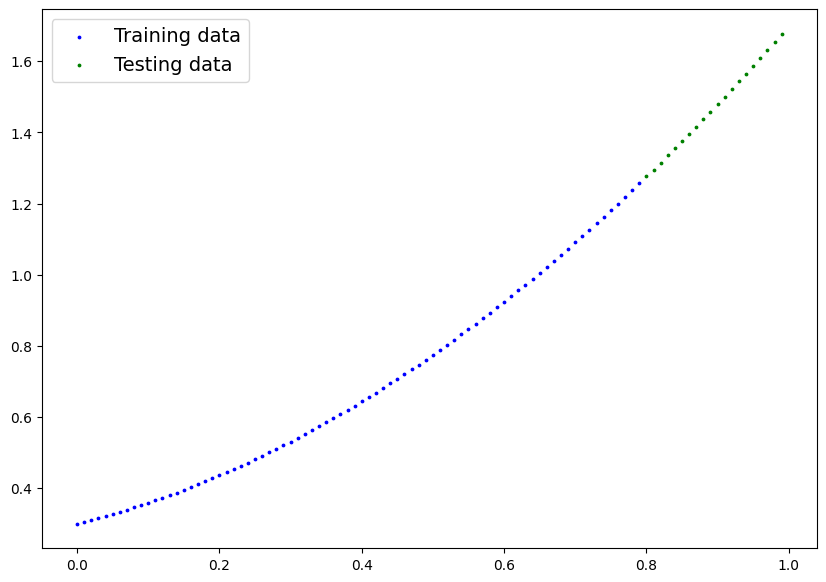

In [100]:
# Writing a function to visualize

def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions= None):
    # Plots training data, test data and compares predictions
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=3, label="Training data") # c -> color, s -> size
    plt.scatter(test_data, test_labels, c="g", s=3, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=3, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()

plot_predictions()

In [101]:
# Build the model
class LineRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.noise = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * (x**2) + self.noise * x + self.bias

torch.optim -> faster gradient descent
torch.utils.data.Dataset -> represents a map between key and sample pairs of data (e.g. images and their associated labels)
torch.utils.data.DataLoader -> create an iterable to iterate through a dataset

In [102]:
torch.manual_seed(67)

model_0 = LineRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([1.9416], requires_grad=True),
 Parameter containing:
 tensor([-1.3425], requires_grad=True),
 Parameter containing:
 tensor([-0.1197], requires_grad=True)]

In [103]:
model_0.state_dict()

OrderedDict([('weight', tensor([1.9416])),
             ('bias', tensor([-1.3425])),
             ('noise', tensor([-0.1197]))])

In [104]:
# Make predictions using torch.inference_mode()
with torch.inference_mode(): # turns off grad_fn also works with torch.no_grad():
    y_preds = model_0(X_test)

y_preds

tensor([[-0.1956],
        [-0.1656],
        [-0.1351],
        [-0.1043],
        [-0.0731],
        [-0.0415],
        [-0.0094],
        [ 0.0229],
        [ 0.0557],
        [ 0.0889],
        [ 0.1224],
        [ 0.1564],
        [ 0.1907],
        [ 0.2254],
        [ 0.2606],
        [ 0.2961],
        [ 0.3319],
        [ 0.3682],
        [ 0.4049],
        [ 0.4419]])

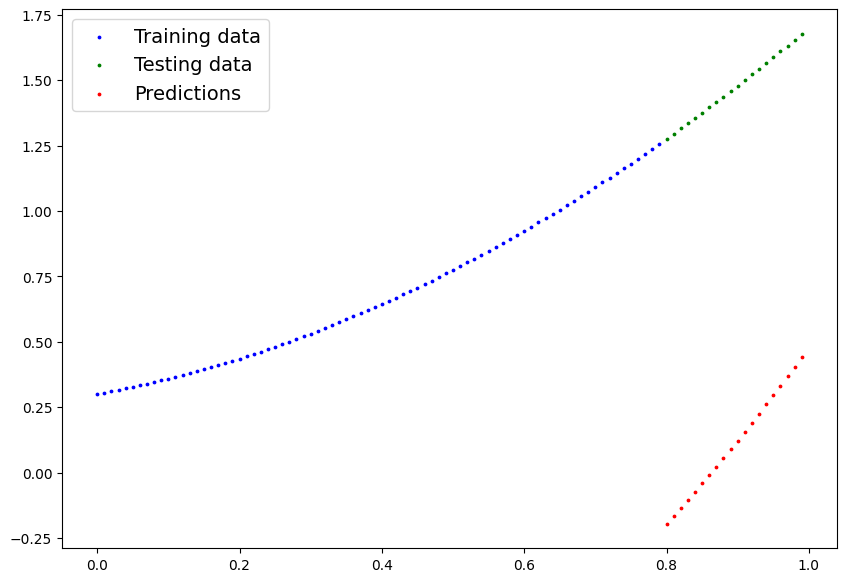

In [105]:
plot_predictions(predictions=y_preds) # show the predictions based on our current model

Epoch 10000: Loss = 0.000006
  Weight: 0.9520 (true: 0.9)
  Bias: 0.3058 (true: 0.3)
  Noise: 0.4578 (true: 0.5)

Epoch 20000: Loss = 0.000000
  Weight: 0.9033 (true: 0.9)
  Bias: 0.3004 (true: 0.3)
  Noise: 0.4973 (true: 0.5)

Epoch 30000: Loss = 0.000000
  Weight: 0.9002 (true: 0.9)
  Bias: 0.3000 (true: 0.3)
  Noise: 0.4998 (true: 0.5)

Epoch 40000: Loss = 0.000000
  Weight: 0.9001 (true: 0.9)
  Bias: 0.3000 (true: 0.3)
  Noise: 0.4999 (true: 0.5)

Epoch: 40000 | Loss: 2.037355874284774e-11 | Test loss: 3.4910102586493963e-10
Model weight: 0.9000940322875977 | Model noise: 0.4999237656593323 | Model bias: 0.3000105023384094


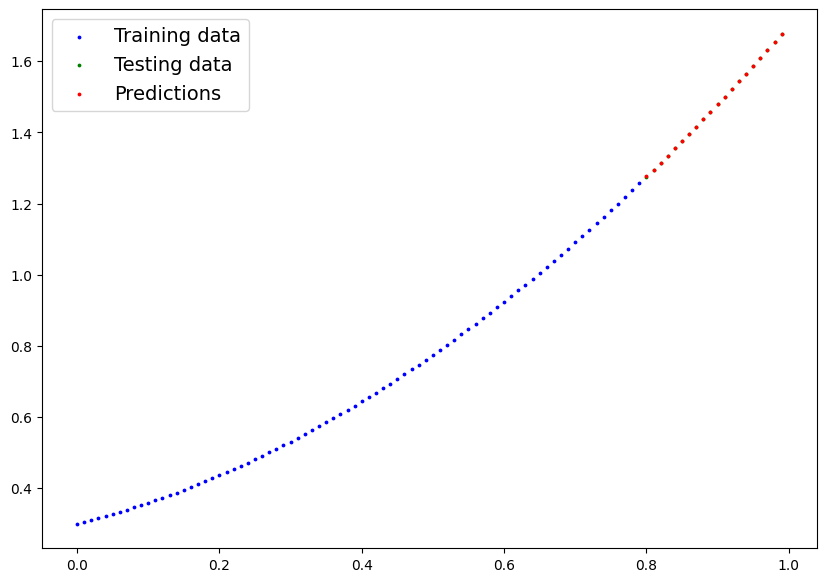

In [106]:
import torch
from torch import nn # stands for neural networks
import matplotlib.pyplot as plt 

# Preparing data
weight, bias, noise = 0.9, 0.3, 0.5

X = torch.arange(0, 1, 0.01).unsqueeze(dim=1) # features
y = weight * (X ** 2) + noise * X + bias
# Creating train and test splits

train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size] 
X_test, y_test = X[train_size:], y[train_size:]
# For professional splitting, use sklearn.model_selection.train_test_split()

# Writing a function to visualize
def plot_predictions(train_data= X_train,
                     train_labels= y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions= None):
    # Plots training data, test data and compares predictions
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=3, label="Training data") # c -> color, s -> size
    plt.scatter(test_data, test_labels, c="g", s=3, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=3, label="Predictions")

    plt.legend(prop={"size": 14})
    plt.show()


# Build the model
class LineRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.noise = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * (x**2) + self.noise * x + self.bias
    
torch.manual_seed(67)
model_0 = LineRegressionModel()

# Make predictions using torch.inference_mode()
with torch.inference_mode(): # turns off grad_fn also works with torch.no_grad():
    y_preds = model_0(X_test)

loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=0.1) # stochastic (random) gradient descent 

# Building training loop
epochs = 40000

for epoch in range(epochs):
    model_0.train() # set train mode for the model -> sets all parameter to require gradients
    # Forward pass
    y_pred = model_0(X_train)
    # Calculate the loss
    loss = loss_fn(y_pred, y_train)
    # Optimizer zero grad
    optimizer.zero_grad()
    # Perform backpropogation on the loss with respect to the parameters of the models
    loss.backward()
    # Step the optimizer (perform gradient descent)
    optimizer.step()

    model_0.eval() # sets require_grad to false
    if (epoch + 1) % 10000 == 0:
        print(f'Epoch {epoch + 1}: Loss = {loss.item():.6f}')
        print(f'  Weight: {model_0.weight.item():.4f} (true: {weight})')
        print(f'  Bias: {model_0.bias.item():.4f} (true: {bias})')
        print(f'  Noise: {model_0.noise.item():.4f} (true: {noise})\n')

with torch.inference_mode():
    test_preds = model_0(X_test)

    test_loss = loss_fn(test_preds, y_test)

print(f"Epoch: {epoch+1} | Loss: {loss} | Test loss: {test_loss}")
print(f"Model weight: {model_0.weight.item()} | Model noise: {model_0.noise.item()} | Model bias: {model_0.bias.item()}")
    
plot_predictions(predictions=test_preds)



In [107]:
# Saving pytorch model
# torch.save() save a pytorch object in python pickle format
# torch.load() load a saved pytorch object
# torch.nn.Module.load_state_dict() load a model's saved state dict -> recommended
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_basic.pt" #common file type -> .pt / .pth
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(model_0.state_dict(), MODEL_SAVE_PATH)